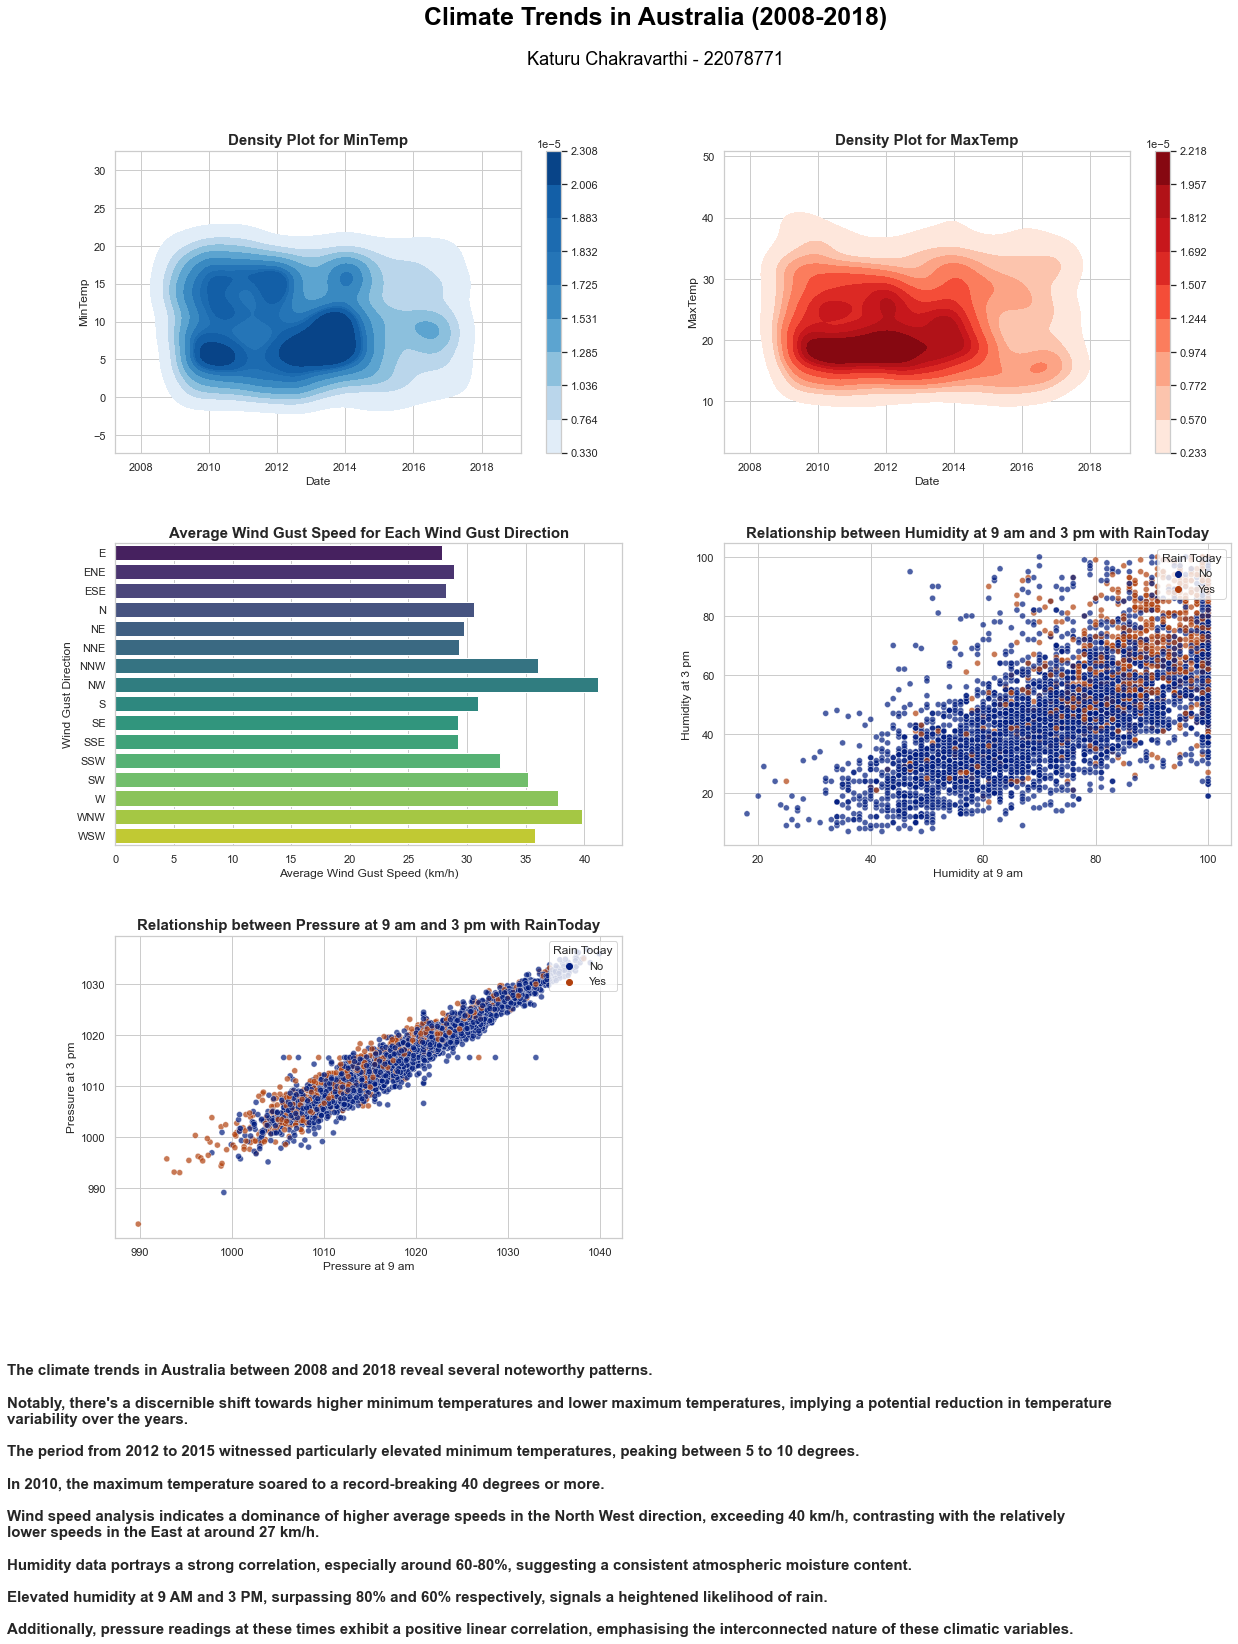

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

df = pd.read_csv('weatherAUS.csv')
df = df[:5000]
missing_values = df.isnull().sum()
df = df.drop(columns=missing_values[missing_values > 99].index)
df = df.apply(lambda x: x.fillna(x.mode()[0]))
df['Date'] = pd.to_datetime(df['Date'])
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20), facecolor='white')
fig.suptitle('Climate Trends in Australia (2008-2018)', fontsize=25, color='black', fontweight='bold')
plt.figtext(0.5, 0.94, 'Katuru Chakravarthi - 22078771', ha='center', fontsize=18, color='black')
sns.kdeplot(x='Date', y='MinTemp', data=df, fill=True, cmap='Blues', cbar=True, ax=axes[0, 0])
axes[0, 0].set_title('Density Plot for MinTemp', fontsize=15, fontweight='bold')
sns.kdeplot(x='Date', y='MaxTemp', data=df, fill=True, cmap='Reds', cbar=True, ax=axes[0, 1])
axes[0, 1].set_title('Density Plot for MaxTemp', fontsize=15, fontweight='bold')
plt.subplots_adjust(hspace=0.3)
average_speeds = df.groupby('WindGustDir')['WindGustSpeed'].mean().reset_index()
sns.barplot(x='WindGustSpeed', y='WindGustDir', data=average_speeds, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_xlabel('Average Wind Gust Speed (km/h)')
axes[1, 0].set_ylabel('Wind Gust Direction')
axes[1, 0].set_title('Average Wind Gust Speed for Each Wind Gust Direction', fontsize=15, fontweight='bold')
sns.scatterplot(x='Humidity9am', y='Humidity3pm', hue='RainToday', data=df, alpha=0.7, palette='dark', ax=axes[1, 1])
axes[1, 1].set_xlabel('Humidity at 9 am')
axes[1, 1].set_ylabel('Humidity at 3 pm')
axes[1, 1].set_title('Relationship between Humidity at 9 am and 3 pm with RainToday', fontsize=15, fontweight='bold')
axes[1, 1].legend(title='Rain Today', loc='upper right')
plt.subplots_adjust(hspace=0.3)
sns.scatterplot(x='Pressure9am', y='Pressure3pm', hue='RainToday', data=df, alpha=0.7, palette='dark', ax=axes[2, 0])
axes[2, 0].set_xlabel('Pressure at 9 am')
axes[2, 0].set_ylabel('Pressure at 3 pm')
axes[2, 0].set_title('Relationship between Pressure at 9 am and 3 pm with RainToday', fontsize=15, fontweight='bold')
axes[2, 0].legend(title='Rain Today', loc='upper right')
fig.delaxes(axes[2, 1])
text = """
The climate trends in Australia between 2008 and 2018 reveal several noteworthy patterns.

Notably, there's a discernible shift towards higher minimum temperatures and lower maximum temperatures, implying a potential reduction in temperature
variability over the years. 

The period from 2012 to 2015 witnessed particularly elevated minimum temperatures, peaking between 5 to 10 degrees. 

In 2010, the maximum temperature soared to a record-breaking 40 degrees or more.

Wind speed analysis indicates a dominance of higher average speeds in the North West direction, exceeding 40 km/h, contrasting with the relatively
lower speeds in the East at around 27 km/h. 

Humidity data portrays a strong correlation, especially around 60-80%, suggesting a consistent atmospheric moisture content.

Elevated humidity at 9 AM and 3 PM, surpassing 80% and 60% respectively, signals a heightened likelihood of rain.
 
Additionally, pressure readings at these times exhibit a positive linear correlation, emphasising the interconnected nature of these climatic variables."""
fig.text(0.05, -0.15, text, fontsize=15, va='baseline', fontweight='bold')
plt.show()